## 고객의 소비등급별 인사이트 발굴

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np

In [3]:
# pd.set_option('display.max_rows', None)
# pd.options.display.max_rows = 60
pd.set_option('display.max_columns', None)

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
import matplotlib.font_manager as fm
fonts = [font.name for font in fm.fontManager.ttflist]
fonts

### Raw data 탐색

In [5]:
df = pd.read_csv('new_retail_data.csv')
df[:5]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,5/8/2023,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,1/10/2024,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [10]:
print(df['Age'].dtype)

float64


#### 결측치 처리

In [6]:
df_notnull = df.copy()
df_notnull[:3]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [7]:
# 결측치 처리 : 데이터형이 float64 이면 0.0으로 치환, 나머지는 Unknown으로 치환
cols = df_notnull.columns.to_list()
for col in cols:
    if df_notnull[col].dtype == 'float64':
        df_notnull[col].fillna(0.0, inplace=True)
    else:
        df_notnull[col].fillna('Unknown', inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7856\3796784937.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_notnull[col].fillna(0.0, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7856\3796784937.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [8]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    302010 non-null  float64
 1   Customer_ID       302010 non-null  float64
 2   Name              302010 non-null  object 
 3   Email             302010 non-null  object 
 4   Phone             302010 non-null  float64
 5   Address           302010 non-null  object 
 6   City              302010 non-null  object 
 7   State             302010 non-null  object 
 8   Zipcode           302010 non-null  float64
 9   Country           302010 non-null  object 
 10  Age               302010 non-null  float64
 11  Gender            302010 non-null  object 
 12  Income            302010 non-null  object 
 13  Customer_Segment  302010 non-null  object 
 14  Date              302010 non-null  object 
 15  Year              302010 non-null  float64
 16  Month             30

In [15]:
# df_notnull[df_notnull['City'] == 'Unknown'][:5]
df_notnull[df_notnull['Customer_ID'] == 0.0][:5]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
1309,9076126.0,0.0,Kara Harris DDS,Yvette79@gmail.com,7.246837e+09,8226 David Lakes,Portsmouth,England,68085.0,UK,21.0,Female,High,Regular,9/18/2023,2023.0,September,1:03:08,4.0,450.970112,1803.880449,Home Decor,Bed Bath & Beyond,Kitchen,Average,Same-Day,Debit Card,Delivered,2.0,Microwave
2069,1125458.0,0.0,Kimberly Summers,James24@gmail.com,2.432282e+09,0887 Goodwin Dale Apt. 043,Portsmouth,England,44430.0,UK,21.0,Male,Medium,Regular,6/10/2023,2023.0,June,19:17:31,5.0,421.381339,2106.906696,Grocery,Nestle,Chocolate,Good,Express,Credit Card,Delivered,3.0,Chocolate-covered fruits
2136,6139774.0,0.0,Robin Fisher,Tanner80@gmail.com,9.338870e+09,5723 Rojas Viaduct,Portsmouth,England,58549.0,UK,21.0,Male,Medium,Regular,3/5/2023,2023.0,March,10:09:01,7.0,409.750458,2868.253204,Home Decor,Bed Bath & Beyond,Bathroom,Average,Standard,Credit Card,Pending,2.0,Sink
2269,5157785.0,0.0,Alexander Stark,Tabitha81@gmail.com,4.236126e+09,27403 Bennett Inlet,Portsmouth,England,4229.0,UK,21.0,Male,Medium,Regular,1/25/2024,2024.0,January,20:39:09,1.0,273.750191,273.750191,Grocery,Nestle,Coffee,Excellent,Express,Debit Card,Pending,4.0,Americano
2396,9668849.0,0.0,Diana Sawyer,Alex49@gmail.com,9.955699e+09,15739 Courtney Drives Apt. 939,Portsmouth,England,77383.0,UK,21.0,Female,Medium,Regular,2/14/2024,2024.0,February,14:42:32,9.0,336.629078,3029.661699,Electronics,Apple,Tablet,Average,Same-Day,Cash,Delivered,2.0,Acer Iconia Tab


#### 중복값 확인

In [16]:
# 거래번호의 중복값 확인
# df_notnull.duplicated()
df_notnull[df_notnull['Transaction_ID'].duplicated()]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
2003,0.0,99112.0,Angela Jones,Scott14@gmail.com,3.860774e+09,5287 Harris Junctions Suite 995,Portsmouth,England,35356.0,UK,21.0,Male,Medium,Regular,2/7/2024,2024.0,February,16:50:24,5.0,311.496410,1557.482050,Books,HarperCollins,Thriller,Bad,Same-Day,Debit Card,Pending,1.0,Psychological thriller
2202,0.0,68894.0,Yvonne Huerta,Peter51@gmail.com,4.987322e+09,10237 Deborah Pass Suite 259,Portsmouth,England,13681.0,UK,21.0,Female,Medium,Regular,2/1/2024,2024.0,February,4:22:01,2.0,49.083412,98.166823,Home Decor,IKEA,Lighting,Bad,Standard,Cash,Shipped,1.0,Track lighting
2791,1636104.0,66432.0,Crystal Baker,Joshua84@gmail.com,2.151258e+09,571 Margaret Island Apt. 303,Portsmouth,England,61041.0,UK,21.0,Male,Medium,Regular,4/5/2023,2023.0,April,15:34:31,3.0,74.958577,224.875730,Books,Random House,Literature,Excellent,Express,Credit Card,Pending,4.0,Short stories
3059,0.0,42747.0,Daniel Smith,Ashley88@gmail.com,8.582474e+09,64688 Walters Ford Suite 079,Portsmouth,England,50429.0,UK,21.0,Female,Medium,Regular,8/6/2023,2023.0,August,7:14:12,2.0,303.955838,607.911677,Grocery,Pepsi,Water,Bad,Express,Credit Card,Pending,1.0,Artesian water
3213,0.0,52484.0,Joseph Clarke,Rodney77@gmail.com,2.865820e+09,0035 Joan Drives,Portsmouth,England,88391.0,UK,21.0,Female,Medium,Regular,3/15/2023,2023.0,March,15:44:18,4.0,58.073853,232.295411,Grocery,Coca-Cola,Juice,Bad,Same-Day,Debit Card,Pending,1.0,Grapefruit juice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,31.0,Male,Medium,Regular,1/20/2024,2024.0,January,23:40:29,5.0,194.792597,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,35.0,Female,Low,New,12/28/2023,2023.0,December,2:55:45,1.0,285.137301,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,41.0,Male,Low,Premium,2/27/2024,2024.0,February,2:43:49,3.0,60.701761,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,41.0,Male,Medium,New,9/3/2023,2023.0,September,11:20:31,1.0,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand


In [ ]:
# 고객번호의 중복값 확인
# df_notnull.duplicated()
df_notnull[df_notnull['Customer_ID'].duplicated()]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
282,7204003.0,48869.0,Lisa Tucker,Donald88@gmail.com,4.872326e+09,24894 Molly Curve Suite 538,Portsmouth,England,78921.0,UK,55.0,Male,High,Regular,2/15/2024,2024.0,February,21:17:50,7.0,352.129035,2464.903248,Books,Random House,Non-Fiction,Good,Express,Credit Card,Shipped,4.0,History
373,8305001.0,45455.0,Richard Lee,Maria88@gmail.com,8.849637e+09,7654 Scott Cliffs,Portsmouth,England,45013.0,UK,41.0,Male,High,Regular,3/10/2023,2023.0,March,6:52:52,7.0,103.578738,725.051164,Clothing,Adidas,T-shirt,Good,Same-Day,PayPal,Delivered,4.0,Graphic tee
642,6590598.0,18113.0,Christopher Allen,Antonio74@gmail.com,7.198140e+09,75178 Sanchez Glen Suite 132,Portsmouth,England,57725.0,UK,63.0,Male,High,Regular,3/22/2023,2023.0,March,1:28:54,8.0,402.613544,3220.908352,Electronics,Samsung,Tablet,Excellent,Standard,PayPal,Processing,4.0,Amazon Fire Tablet
645,5821981.0,13082.0,Tami Bennett,Joshua56@gmail.com,6.591047e+09,315 Nelson Shores,Portsmouth,England,99305.0,UK,68.0,Male,High,Regular,9/24/2023,2023.0,September,14:28:52,3.0,194.049979,582.149938,Clothing,Nike,Shorts,Average,Express,Debit Card,Shipped,2.0,Cargo shorts
690,1096370.0,59024.0,Adam Reid,John22@gmail.com,3.184529e+09,472 Bruce Vista,Portsmouth,England,88173.0,UK,53.0,Female,High,Regular,3/3/2023,2023.0,March,3:05:36,3.0,251.386694,754.160082,Grocery,Nestle,Coffee,Bad,Same-Day,Debit Card,Shipped,1.0,Espresso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,31.0,Male,Medium,Regular,1/20/2024,2024.0,January,23:40:29,5.0,194.792597,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,35.0,Female,Low,New,12/28/2023,2023.0,December,2:55:45,1.0,285.137301,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,41.0,Male,Low,Premium,2/27/2024,2024.0,February,2:43:49,3.0,60.701761,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,41.0,Male,Medium,New,9/3/2023,2023.0,September,11:20:31,1.0,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand


In [20]:
# df_notnull[df_notnull['Transaction_ID'] == 1636104.0]
# df_notnull[df_notnull['Transaction_ID'] == 9301950.0]
df_notnull[df_notnull['Transaction_ID'] == 9999436.0]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
152213,9999436.0,16060.0,John Castaneda,Karen15@gmail.com,7.742731e+09,80534 Duran Crest,San Francisco,Maine,60830.0,USA,23.0,Female,High,Regular,4/3/2023,2023.0,April,1:05:23,6.0,498.284666,2989.707998,Grocery,Pepsi,Water,Good,Same-Day,Cash,Delivered,4.0,Flavored water
247677,9999436.0,84480.0,Gail Spencer,Mackenzie65@gmail.com,4.595731e+09,916 Patricia Alley,Gold Coast,New South Wales,95463.0,Australia,22.0,Male,High,New,5/21/2023,2023.0,May,8:49:12,1.0,466.440903,466.440903,Clothing,Zara,Jeans,Good,Express,Credit Card,Delivered,4.0,Low-rise jeans


In [54]:
# 중복되는 거래번호의 개수 확인
len(df_notnull[df_notnull['Transaction_ID'].duplicated()]['Transaction_ID'].unique())

7092

In [10]:
dup_lst = df_notnull[df_notnull['Transaction_ID'].duplicated()]['Transaction_ID'].unique().tolist()
dup_lst.sort()
dup_lst

[0.0,
 1003092.0,
 1005039.0,
 1005669.0,
 1008244.0,
 1010919.0,
 1015985.0,
 1018230.0,
 1019014.0,
 1019366.0,
 1021291.0,
 1022174.0,
 1022229.0,
 1022470.0,
 1022498.0,
 1022661.0,
 1023538.0,
 1025832.0,
 1026583.0,
 1026673.0,
 1027513.0,
 1031034.0,
 1031925.0,
 1033223.0,
 1034160.0,
 1034468.0,
 1034695.0,
 1036271.0,
 1036588.0,
 1037908.0,
 1039499.0,
 1040569.0,
 1043521.0,
 1044580.0,
 1050108.0,
 1055003.0,
 1057329.0,
 1057555.0,
 1058108.0,
 1058443.0,
 1058975.0,
 1060874.0,
 1064814.0,
 1065978.0,
 1068891.0,
 1068945.0,
 1072164.0,
 1075414.0,
 1075479.0,
 1076117.0,
 1077429.0,
 1077432.0,
 1078188.0,
 1078299.0,
 1078495.0,
 1078952.0,
 1079646.0,
 1081053.0,
 1081779.0,
 1081880.0,
 1082190.0,
 1082192.0,
 1082631.0,
 1086901.0,
 1088718.0,
 1089109.0,
 1089696.0,
 1090448.0,
 1090620.0,
 1092188.0,
 1092202.0,
 1092854.0,
 1100666.0,
 1102149.0,
 1102280.0,
 1102916.0,
 1104057.0,
 1105015.0,
 1105049.0,
 1105831.0,
 1105898.0,
 1106916.0,
 1107584.0,
 1108514.0

In [17]:
# df_notnull[df_notnull['Transaction_ID'] == 1003092.0]
df_notnull[df_notnull['Transaction_ID'] == 1003092.0].reset_index().iloc[:, 1:]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,1003092.0,27378.0,Nicholas Moore,Danielle79@gmail.com,6.988331e+09,5564 Daniel Garden Apt. 073,Chicago,Connecticut,6790.0,USA,34.0,Male,Low,Regular,5/26/2023,2023.0,May,7:06:21,2.0,262.455766,524.911533,Grocery,Pepsi,Water,Good,Standard,PayPal,Delivered,4.0,Bottled water
1,1003092.0,97124.0,Yolanda Blankenship,Kristine9@gmail.com,2.360380e+09,0933 Yolanda Island,St. John's,Ontario,9692.0,Canada,23.0,Female,Low,Regular,6/9/2023,2023.0,June,1:59:01,6.0,380.997524,2285.985142,Home Decor,Bed Bath & Beyond,Bathroom,Good,Standard,Cash,Pending,4.0,Shower


In [20]:
# 중복되는 거래번호 데이터만 모아서 데이터 프레임 형성 (거래번호 0.0 은 제외)
dup_df = df_notnull[df_notnull['Transaction_ID'] == 1003092.0].reset_index().iloc[:, 1:]

for i in range(2, len(dup_lst)):
    a = df_notnull[df_notnull['Transaction_ID'] == dup_lst[i]].reset_index().iloc[:, 1:]
    dup_df = pd.concat([dup_df, a], axis=0)

dup_df

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,1003092.0,27378.0,Nicholas Moore,Danielle79@gmail.com,6.988331e+09,5564 Daniel Garden Apt. 073,Chicago,Connecticut,6790.0,USA,34.0,Male,Low,Regular,5/26/2023,2023.0,May,7:06:21,2.0,262.455766,524.911533,Grocery,Pepsi,Water,Good,Standard,PayPal,Delivered,4.0,Bottled water
1,1003092.0,97124.0,Yolanda Blankenship,Kristine9@gmail.com,2.360380e+09,0933 Yolanda Island,St. John's,Ontario,9692.0,Canada,23.0,Female,Low,Regular,6/9/2023,2023.0,June,1:59:01,6.0,380.997524,2285.985142,Home Decor,Bed Bath & Beyond,Bathroom,Good,Standard,Cash,Pending,4.0,Shower
0,1005039.0,84239.0,John Tate,Andrea27@gmail.com,9.064051e+09,7563 Pittman Tunnel,Bonn,Berlin,35327.0,Germany,23.0,Female,Medium,New,8/16/2023,2023.0,August,6:28:42,9.0,123.813346,1114.320116,Grocery,Coca-Cola,Water,Bad,Same-Day,Debit Card,Pending,1.0,Flavored water
1,1005039.0,84239.0,John Tate,Andrea27@gmail.com,9.064051e+09,7563 Pittman Tunnel,Bonn,Berlin,35327.0,Germany,68.0,Female,High,New,8/16/2023,2023.0,August,6:28:42,9.0,123.813346,1114.320116,Grocery,Coca-Cola,Water,Bad,Same-Day,Cash,Pending,1.0,Sparkling water
0,1005669.0,36372.0,Marcus Hess,Allison19@gmail.com,5.056088e+09,018 Vanessa Mountain Suite 024,Wollongong,New South Wales,86001.0,Australia,36.0,Female,Low,New,2/10/2024,2024.0,February,21:10:21,8.0,496.803245,3974.425960,Grocery,Nestle,Coffee,Excellent,Same-Day,Debit Card,Delivered,4.0,Espresso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,9997512.0,44373.0,Phyllis Goodwin,Rebecca84@gmail.com,9.095447e+09,06360 Sean Forges,Winnipeg,Ontario,8553.0,Canada,20.0,Female,Low,New,4/2/2023,2023.0,April,0:56:27,5.0,479.269917,2396.349586,Electronics,Apple,Tablet,Excellent,Express,Credit Card,Shipped,5.0,Lenovo Tab
0,9997814.0,63803.0,Ryan Huffman,Justin44@gmail.com,8.496339e+09,53541 Clark Mission,San Francisco,Maine,36488.0,USA,23.0,Female,High,Regular,5/26/2023,2023.0,May,21:13:41,4.0,356.065242,1424.260967,Home Decor,Bed Bath & Beyond,Bathroom,Average,Standard,Credit Card,Shipped,2.0,Shower curtain
1,9997814.0,11602.0,Jennifer Garcia,Thomas38@gmail.com,4.668591e+09,47983 Herring Pine,Montreal,Ontario,62306.0,Canada,43.0,Male,Low,Regular,7/23/2023,2023.0,April,22:20:08,9.0,15.907659,143.168933,Electronics,Mitsubhisi,Mitsubishi 1.5 Ton 3 Star Split AC,Excellent,Same-Day,Credit Card,Delivered,5.0,Window AC
0,9999436.0,16060.0,John Castaneda,Karen15@gmail.com,7.742731e+09,80534 Duran Crest,San Francisco,Maine,60830.0,USA,23.0,Female,High,Regular,4/3/2023,2023.0,April,1:05:23,6.0,498.284666,2989.707998,Grocery,Pepsi,Water,Good,Same-Day,Cash,Delivered,4.0,Flavored water


In [22]:
dup_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14307 entries, 0 to 1
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    14307 non-null  float64
 1   Customer_ID       14307 non-null  float64
 2   Name              14307 non-null  object 
 3   Email             14307 non-null  object 
 4   Phone             14307 non-null  float64
 5   Address           14307 non-null  object 
 6   City              14307 non-null  object 
 7   State             14307 non-null  object 
 8   Zipcode           14307 non-null  float64
 9   Country           14307 non-null  object 
 10  Age               14307 non-null  float64
 11  Gender            14307 non-null  object 
 12  Income            14307 non-null  object 
 13  Customer_Segment  14307 non-null  object 
 14  Date              14307 non-null  object 
 15  Year              14307 non-null  float64
 16  Month             14307 non-null  object 
 17  Ti

In [23]:
# 데이터 프레임으로 저장
dup_df = dup_df.reset_index().iloc[:, 1:]
dup_df.to_csv('./new_retail_data_duplicated.csv', index=False)

고객번호와 고객정보, 구매내역 등은 분명 다른데, 거래번호가 같은 데이터가 전체 데이터의 50% 정도나 된다.\
왜 거래번호가 같은 것인지, 이러한 현상이 나타나는 이유는 무엇인지 파악해 볼 필요가 있다고 생각된다.

#### 이상치 처리

<Axes: >

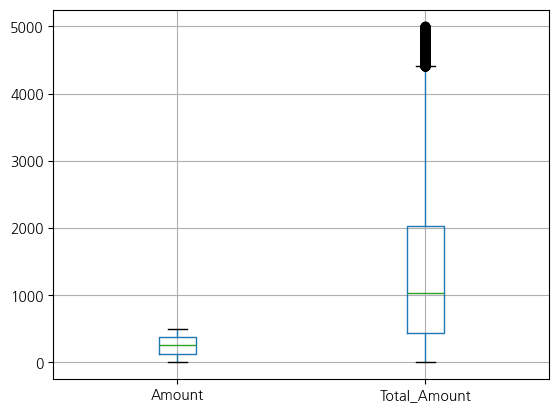

In [16]:
# 이상치 확인
# df_notnull.boxplot(column=['Age'])    # 이상치 없음
# df_notnull.boxplot(column=['Total_Purchases'])    # 이상치 없음
df_notnull.boxplot(column=['Amount', 'Total_Amount'])

In [17]:
q1 = df_notnull['Total_Amount'].quantile(q=0.25)
q3 = df_notnull['Total_Amount'].quantile(q=0.75)
iqr = q3-q1
print('q1 : ', q1)
print('q3 : ', q3)
print('iqr : ', iqr)

q1 :  437.337069175
q3 :  2027.960721
iqr :  1590.6236518249998


In [23]:
# Total_Amount 값이 이상치인 경우의 데이터만 조회
TA_iqr = df_notnull[df_notnull['Total_Amount'] > q3 + (iqr * 1.5)]
print(len(TA_iqr))
print(TA_iqr['Total_Amount'].min())
print(TA_iqr['Total_Amount'].max())

3934
4413.951906
4999.625796


In [29]:
# 이상치 값을 갖고 있는 데이터 탐색
TA_iqr = TA_iqr.reset_index().iloc[:, 1:]
TA_iqr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    3934 non-null   int64  
 1   Customer_ID       3934 non-null   int64  
 2   City              3934 non-null   object 
 3   State             3934 non-null   object 
 4   Country           3934 non-null   object 
 5   Age               3934 non-null   int64  
 6   Gender            3934 non-null   object 
 7   Income            3934 non-null   object 
 8   Customer_Segment  3934 non-null   object 
 9   Date              3934 non-null   object 
 10  Year              3934 non-null   int64  
 11  Month             3934 non-null   object 
 12  Time              3934 non-null   object 
 13  Total_Purchases   3934 non-null   float64
 14  Amount            3934 non-null   float64
 15  Total_Amount      3934 non-null   float64
 16  Product_Category  3934 non-null   object 


In [30]:
TA_iqr[:3]

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,4613625,72950,Portsmouth,England,UK,51,Female,Low,Regular,6/6/2023,2023,June,9:03:24,10.0,488.528716,4885.287161,Electronics,Samsung,Television,Average,Same-Day,Debit Card,Pending,2.0,Android TV
1,8093529,45413,Portsmouth,England,UK,63,Male,Medium,Regular,3/4/2023,2023,March,20:54:01,10.0,485.077362,4850.773617,Books,Penguin Books,Children's,Bad,Standard,Debit Card,Delivered,1.0,Art supplies
2,5777205,20280,Portsmouth,England,UK,23,Male,Low,Regular,12/5/2023,2023,December,13:55:19,10.0,448.712769,4487.127690,Clothing,Zara,Jeans,Average,Same-Day,Debit Card,Delivered,2.0,Distressed jeans


In [35]:
TA_iqr.columns

Index(['Transaction_ID', 'Customer_ID', 'City', 'State', 'Country', 'Age',
       'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time',
       'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category',
       'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method',
       'Payment_Method', 'Order_Status', 'Ratings', 'products'],
      dtype='object')

결측치, 중복값, 이상치를 확인해본 결과, 해당 값들이 전체 데이터에서 차지하는 정도가 적지 않으므로,\
일단은 무조건적인 삭제는 하지 않고 계속 분석을 이어가고자 한다.

In [26]:
# df_notnull
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    302010 non-null  float64
 1   Customer_ID       302010 non-null  float64
 2   Name              302010 non-null  object 
 3   Email             302010 non-null  object 
 4   Phone             302010 non-null  float64
 5   Address           302010 non-null  object 
 6   City              302010 non-null  object 
 7   State             302010 non-null  object 
 8   Zipcode           302010 non-null  float64
 9   Country           302010 non-null  object 
 10  Age               302010 non-null  float64
 11  Gender            302010 non-null  object 
 12  Income            302010 non-null  object 
 13  Customer_Segment  302010 non-null  object 
 14  Date              302010 non-null  object 
 15  Year              302010 non-null  float64
 16  Month             30

In [ ]:
# 분석에 불필요한 컬럼 제외 (이름, 이메일주소, 전화번호, 주소, 우편번호)
df_notnull = df.drop(columns=['Name', 'Email', 'Phone', 'Address', 'Zipcode'])
df_notnull[:5]

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Nottingham,England,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Edmonton,Ontario,Canada,56.0,Male,High,Premium,5/8/2023,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Bristol,England,UK,22.0,Male,Low,Premium,1/10/2024,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [ ]:
# 데이터형변환 float64 --> int64
df_notnull = df_notnull.astype({'Transaction_ID': 'int', 'Customer_ID': 'int', 'Age': 'int', 'Year': 'int'})
df_notnull.dtypes

Transaction_ID        int64
Customer_ID           int64
City                 object
State                object
Country              object
Age                   int64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                  int64
Month                object
Time                 object
Total_Purchases     float64
Amount              float64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Feedback             object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings             float64
products             object
dtype: object

In [13]:
# 컬럼 이름 변경
df_notnull.rename(columns={'Transaction_ID': 'Transaction_ID(구매번호)',
                           'Customer_ID': 'Customer_ID(고객번호)',
                           'City': 'City(시)',
                           'State': 'State(주)',
                           'Country': 'Country(국가)',
                           'Age': 'Age(나이)',
                           'Gender': 'Gender(성별)',
                           'Income': 'Income(소득수준)',
                           'Customer_Segment': 'Customer_Segment(소비등급)',
                           'Date': 'Date(구매날짜)',
                           'Year': 'Year(연도)',
                           'Month': 'Month(월)',
                           'Time': 'Time(시간)',
                           'Total_Purchases': 'Total_Purchases(총구매수)',
                           'Amount': 'Amount(금액)',
                           'Total_Amount': 'Total_Amount(총구매금액)',
                           'Product_Category': 'Product_Category(카테고리)',
                           'Product_Brand': 'Product_Brand(브랜드)',
                           'Product_Type': 'Product_Type(상품유형)',
                           'Feedback': 'Feedback(피드백)',
                           'Shipping_Method': 'Shipping_Method(배송방법)',
                           'Payment_Method': 'Payment_Method(결제방법)',
                           'Order_Status': 'Order_Status(주문상태)',
                           'Ratings': 'Ratings(평점)',
                           'products': 'products(상품명)'}, inplace=True)

In [14]:
df_notnull[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Nottingham,England,UK,19,Female,Low,Premium,12/31/2023,2023,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,Australia,48,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [15]:
df_notnull[df_notnull['Age(나이)'] == 0][:5]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
232,3601539,93979,Portsmouth,England,UK,0,Female,Low,Regular,1/9/2024,2024,January,8:44:51,10.0,32.115559,321.155591,Grocery,Coca-Cola,Water,Average,Same-Day,Credit Card,Pending,2.0,Bottled water
575,7443430,28320,Portsmouth,England,UK,0,Female,High,Regular,10/20/2023,2023,October,3:59:07,9.0,211.259930,1901.339367,Grocery,Nestle,Snacks,Average,Same-Day,Cash,Processing,2.0,Beef jerky
22330,3565814,32816,Frankfurt,Berlin,Germany,0,Female,Low,New,8/16/2023,2023,August,18:33:56,1.0,84.572575,84.572575,Clothing,Nike,Shoes,Good,Same-Day,PayPal,Delivered,4.0,High heels
168555,1147230,99092,Essen,Berlin,Germany,0,Female,Medium,New,7/12/2023,2023,July,17:47:14,8.0,161.980816,1295.846525,Home Decor,IKEA,Decorations,Good,Express,Cash,Delivered,3.0,Decorative pillows
169403,1348389,97823,Oklahoma City,South Carolina,USA,0,Female,Medium,New,2/16/2024,2024,July,17:20:51,8.0,313.652977,2509.223814,Grocery,Coca-Cola,Soft Drink,Average,Same-Day,Cash,Delivered,2.0,Cola


In [14]:
# 수정된 데이터프레임을 csv 파일로 저장
df_notnull.to_csv('./new_retail_data_notnull.csv', index=False)

### 1. 소비자 등급 별 매출 분석

이미 지정되어있는 소비자 등급을 기준으로 매출 분석을 수행해보았다.

In [27]:
df_notnull = pd.read_csv('new_retail_data_notnull.csv')
df_notnull[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Nottingham,England,UK,19,Female,Low,Premium,12/31/2023,2023,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,Australia,48,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [5]:
# 결측치 및 데이터형 확인
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction_ID(구매번호)    302010 non-null  int64  
 1   Customer_ID(고객번호)       302010 non-null  int64  
 2   City(시)                 302010 non-null  object 
 3   State(주)                302010 non-null  object 
 4   Country(국가)             302010 non-null  object 
 5   Age(나이)                 302010 non-null  int64  
 6   Gender(성별)              302010 non-null  object 
 7   Income(소득수준)            302010 non-null  object 
 8   Customer_Segment(소비등급)  302010 non-null  object 
 9   Date(구매날짜)              302010 non-null  object 
 10  Year(연도)                302010 non-null  int64  
 11  Month(월)                302010 non-null  object 
 12  Time(시간)                302010 non-null  object 
 13  Total_Purchases(총구매수)   302010 non-null  float64
 14  Amount(금액)          

In [6]:
# df_notnull[df_notnull['Date(구매날짜)'] != 'Unknown']
df_notnull[df_notnull['Year(연도)'] == 0]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
99,9823195,14549,Portsmouth,England,UK,62,Female,Medium,Regular,11/8/2023,0,November,17:08:17,4.0,104.506337,418.025349,Books,Penguin Books,Fiction,Excellent,Express,Cash,Processing,5.0,Literary fiction
1478,4936631,23030,Portsmouth,England,UK,21,Male,High,Regular,3/25/2023,0,March,4:23:34,6.0,405.502990,2433.017938,Electronics,Apple,Laptop,Average,Standard,Cash,Pending,2.0,Razer Blade
1714,4281330,46723,Portsmouth,England,UK,21,Male,High,Regular,8/31/2023,0,August,11:06:31,3.0,279.306652,837.919957,Grocery,Pepsi,Soft Drink,Good,Standard,Cash,Processing,4.0,Fruit punch
1891,8190326,18666,Portsmouth,England,UK,21,Male,Medium,Regular,10/22/2023,0,October,15:09:26,6.0,328.990235,1973.941410,Electronics,Sony,Headphones,Excellent,Express,Debit Card,Shipped,4.0,Gaming headphones
3931,9338987,32128,Portsmouth,England,UK,21,Female,Medium,Regular,4/11/2023,0,April,6:28:34,9.0,186.023186,1674.208672,Electronics,Apple,Tablet,Excellent,Standard,Debit Card,Processing,4.0,Amazon Fire Tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297250,9719846,62505,Munich,Berlin,Germany,34,Female,Low,Regular,2/14/2024,0,February,0:41:09,4.0,10.357410,41.429640,Books,Penguin Books,Fiction,Excellent,Express,Credit Card,Processing,4.0,Dystopian
297293,2336634,63382,Fort Worth,Vermont,USA,42,Female,Medium,Regular,7/17/2023,0,July,14:33:58,3.0,11.125645,33.376935,Electronics,Samsung,Smartphone,Bad,Express,Credit Card,Pending,1.0,Nokia
297953,3117917,43644,Perth,New South Wales,Australia,42,Female,Medium,New,6/30/2023,0,June,11:17:04,1.0,35.593755,35.593755,Grocery,Coca-Cola,Juice,Average,Express,Credit Card,Pending,2.0,Cranberry juice
298663,1374555,90389,Columbus,Texas,USA,69,Male,Medium,Regular,11/20/2023,0,November,2:23:55,2.0,350.673770,701.347540,Clothing,Adidas,T-shirt,Excellent,Express,Credit Card,Pending,5.0,Crop top


In [7]:
# 소비등급 확인
df_notnull['Customer_Segment(소비등급)'].unique()

array(['Regular', 'Premium', 'New', 'Unknown'], dtype=object)

In [11]:
# 소비등급 별 매출 확인
df_notnull.groupby(['Customer_Segment(소비등급)'])[['Total_Amount(총구매금액)']].sum().sort_values('Total_Amount(총구매금액)', ascending=False)

,Total_Amount(총구매금액)
Customer_Segment(소비등급),
Regular,1.999656e+08
New,1.245976e+08
Premium,8.767392e+07
Unknown,3.285013e+05


Text(0.5, 1.0, '소비등급별 총 구매금액')

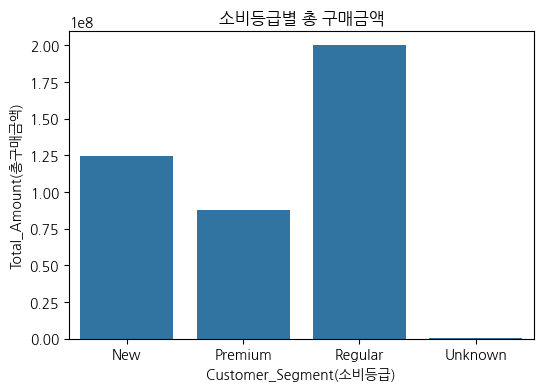

In [8]:
# 소비등급 별 매출 시각화
a = df_notnull.groupby(['Customer_Segment(소비등급)'])[['Total_Amount(총구매금액)']].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=a, x="Customer_Segment(소비등급)", y="Total_Amount(총구매금액)")
plt.title('소비등급별 총 구매금액')

2023년, 2024년을 다 통틀어 소비등급별 총 구매금액에 대해 시각화를 했을 때,\
Regular 등급의 구매금액이 가장 많았다.

In [9]:
# 소비등급 별 최대 구매수 확인
b = df_notnull.groupby(['Customer_Segment(소비등급)'])[['Total_Purchases(총구매수)']].max().reset_index()
b

,Customer_Segment(소비등급),Total_Purchases(총구매수)
0,New,10.0
1,Premium,10.0
2,Regular,10.0
3,Unknown,10.0


In [10]:
pd.merge(left=a, right=b, on='Customer_Segment(소비등급)', how='outer')

,Customer_Segment(소비등급),Total_Amount(총구매금액),Total_Purchases(총구매수)
0,New,1.245976e+08,10.0
1,Premium,8.767392e+07,10.0
2,Regular,1.999656e+08,10.0
3,Unknown,3.285013e+05,10.0


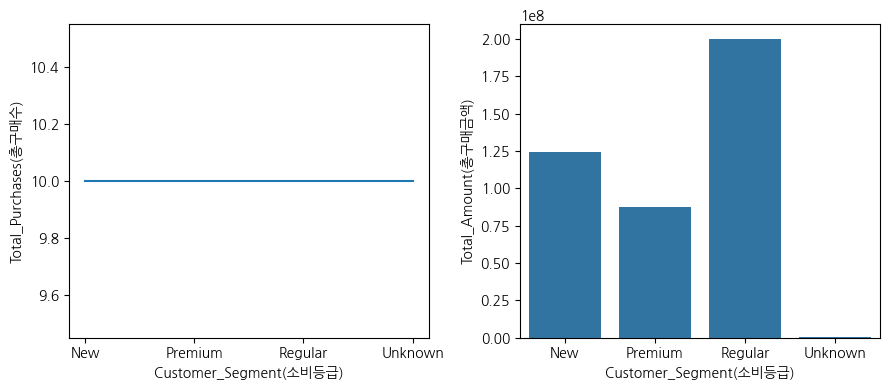

In [11]:
# 소비등급 별 총 구매금액, 최대구매횟수 시각화
c = pd.merge(left=a, right=b, on='Customer_Segment(소비등급)', how='outer')

fig, axes = plt.subplots(figsize=(9, 4), ncols=2, nrows=1)
sns.lineplot(data=c, x='Customer_Segment(소비등급)', y='Total_Purchases(총구매수)', ax=axes[0])
sns.barplot(data=c, x='Customer_Segment(소비등급)', y='Total_Amount(총구매금액)', ax=axes[1])

plt.tight_layout()
plt.show()

Premium 등급의 총 매출이 가장 많을 것이라 생각했으나, Regular 등급의 매출이 가장 높았다.\
구매날짜를 기준으로 하여 년도별, 소비등급별 매출을 살펴보고자 한다.

In [35]:
df_notnull['Year(연도)'].dtype

dtype('int64')

In [56]:
df_notnull['Year(연도)'].unique()

array([2023, 2024,    0])

In [ ]:
# Year(연도) 값이 0인 경우 Date(구매날짜) 컬럼 값에서 연도 값을 가져와 치환
for i in range(len(df_notnull)):
    if df_notnull['Year(연도)'][i] == 0:
        df_notnull['Year(연도)'][i] = int(df_notnull['Date(구매날짜)'][i][-4:])

df_notnull[df_notnull['Year(연도)'] == 0]

In [58]:
# 년도별 소비등급별 매출
df_notnull.groupby(['Year(연도)', 'Customer_Segment(소비등급)'])[['Total_Amount(총구매금액)']].sum().reset_index()

,Year(연도),Customer_Segment(소비등급),Total_Amount(총구매금액)
0,2023,New,1.040881e+08
1,2023,Premium,7.323658e+07
2,2023,Regular,1.670900e+08
3,2023,Unknown,2.734215e+05
4,2024,New,2.050952e+07
5,2024,Premium,1.443734e+07
6,2024,Regular,3.287563e+07
7,2024,Unknown,5.507984e+04


Text(0.5, 1.0, '년도별 소비등급별 총 구매금액')

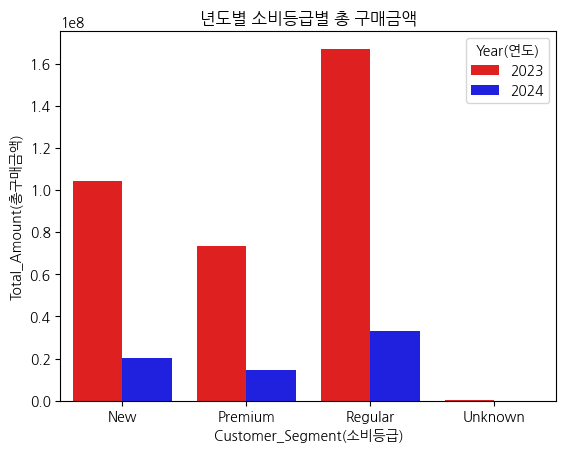

In [88]:
c = df_notnull.groupby(['Year(연도)', 'Customer_Segment(소비등급)'])[['Total_Amount(총구매금액)']].sum().reset_index()
sns.barplot(data=c, x='Customer_Segment(소비등급)', y='Total_Amount(총구매금액)', hue='Year(연도)', palette=['red', 'blue'])
plt.title('년도별 소비등급별 총 구매금액')

2024년에 비해 2023년도 구매금액이 월등히 많았고, 2024년도 2023년과 동일하게 Regular 등급의 구매금액이 가장 많았다.\
년도별, 월별 구매금액은 어땠는지 알아보고자 한다.

In [76]:
# pd.to_datetime(df_notnull['Date(구매날짜)'][0]).date()
pd.to_datetime(df_notnull['Date(구매날짜)'][0]).strftime('%B')

'September'

In [81]:
# 구매날짜와 월 데이터가 모두 'Unknown' 인 경우
a = df_notnull[df_notnull['Date(구매날짜)'] == 'Unknown']
a[a['Month(월)'] == 'Unknown']

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
205382,5090991,30625,Calgary,Ontario,Canada,65,Male,Low,Regular,Unknown,2023,Unknown,8:56:02,2.0,77.245802,154.491603,Electronics,Apple,Laptop,Average,Standard,Credit Card,Processing,2.0,Acer Swift


In [ ]:
# Month(월) 값이 Unknown 인 경우 Date(구매날짜) 컬럼 값에서 연도 값을 가져와 치환
# df_notnull[df_notnull['Month(월)'] == 'Unknown']
for i in range(len(df_notnull)):
    if df_notnull['Month(월)'][i] == 'Unknown':
        if df_notnull['Date(구매날짜)'][i] != 'Unknown':
            df_notnull['Month(월)'][i] = pd.to_datetime(df_notnull['Date(구매날짜)'][i]).strftime('%B')

In [83]:
df_notnull[df_notnull['Month(월)'] == 'Unknown']

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
205382,5090991,30625,Calgary,Ontario,Canada,65,Male,Low,Regular,Unknown,2023,Unknown,8:56:02,2.0,77.245802,154.491603,Electronics,Apple,Laptop,Average,Standard,Credit Card,Processing,2.0,Acer Swift


In [86]:
df_notnull[df_notnull['Year(연도)'] == 2024]['Month(월)'].unique()

array(['January', 'February', 'June', 'July', 'August', 'December',
       'April', 'November', 'March', 'October', 'May', 'September'],
      dtype=object)

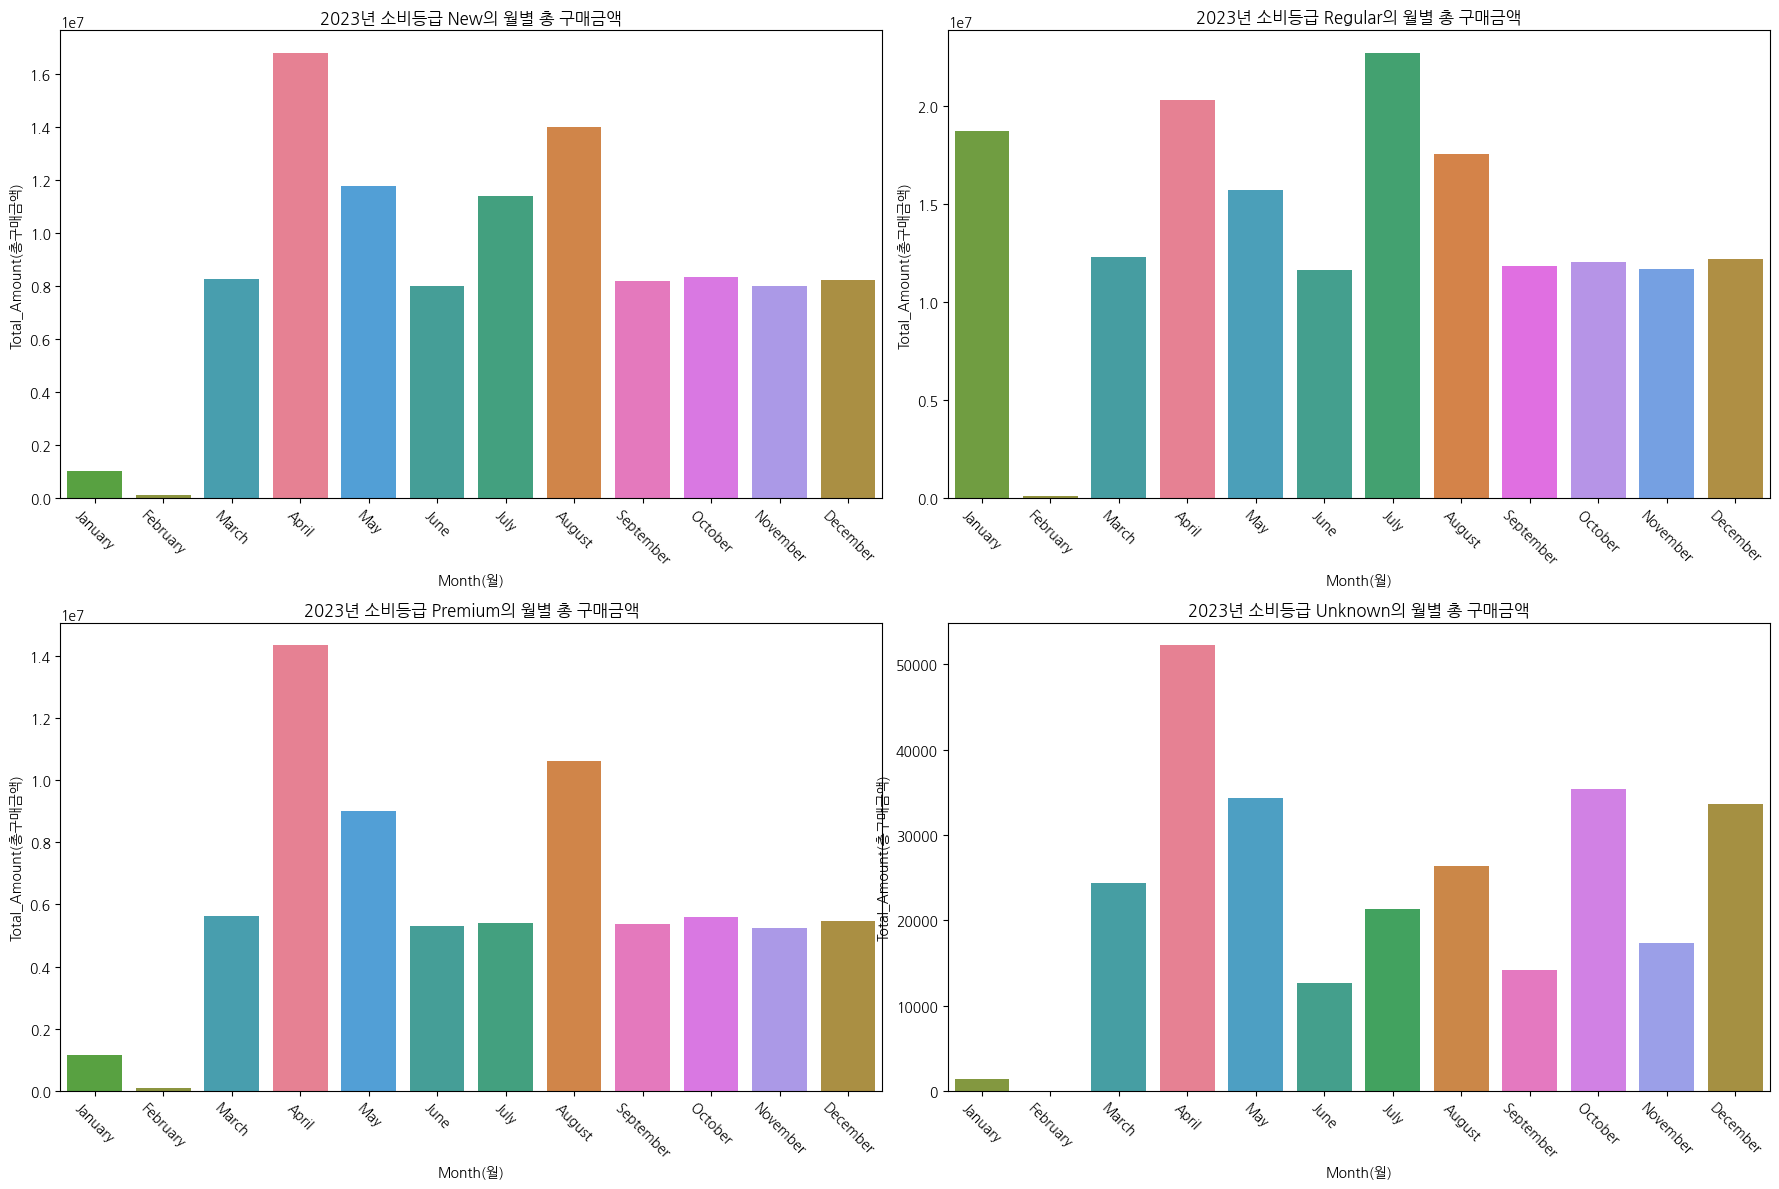

In [112]:
# 2023년 월별, 소비등급별 매출
d = df_notnull[df_notnull['Year(연도)'] == 2023].groupby(['Month(월)', 'Customer_Segment(소비등급)'])[['Total_Amount(총구매금액)']].sum().reset_index()
# sns.barplot(data=d, x='Customer_Segment(소비등급)', y='Total_Amount(총구매금액)', hue='Month(월)')

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18,12))
segment = ['New', 'Regular', 'Premium', 'Unknown']
for i, seg in enumerate(segment):
    plt.subplot(2, 2, i+1)
    plt.tight_layout()
    plt.xticks(rotation=-45)
    plt.title(f'2023년 소비등급 {seg}의 월별 총 구매금액')

    sns.barplot(data=d[d['Customer_Segment(소비등급)'] == seg], x='Month(월)', y='Total_Amount(총구매금액)',
                order=month_order, hue='Month(월)')

모든 소비등급이 4월 구매금액이 가장 많았다. (다음으로는 8월, 5월, ...)\
구매금액이 가장 많았던 Regular 등급은 7월, 4월, 1월 순으로 구매금액이 많다.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7856\971713543.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)


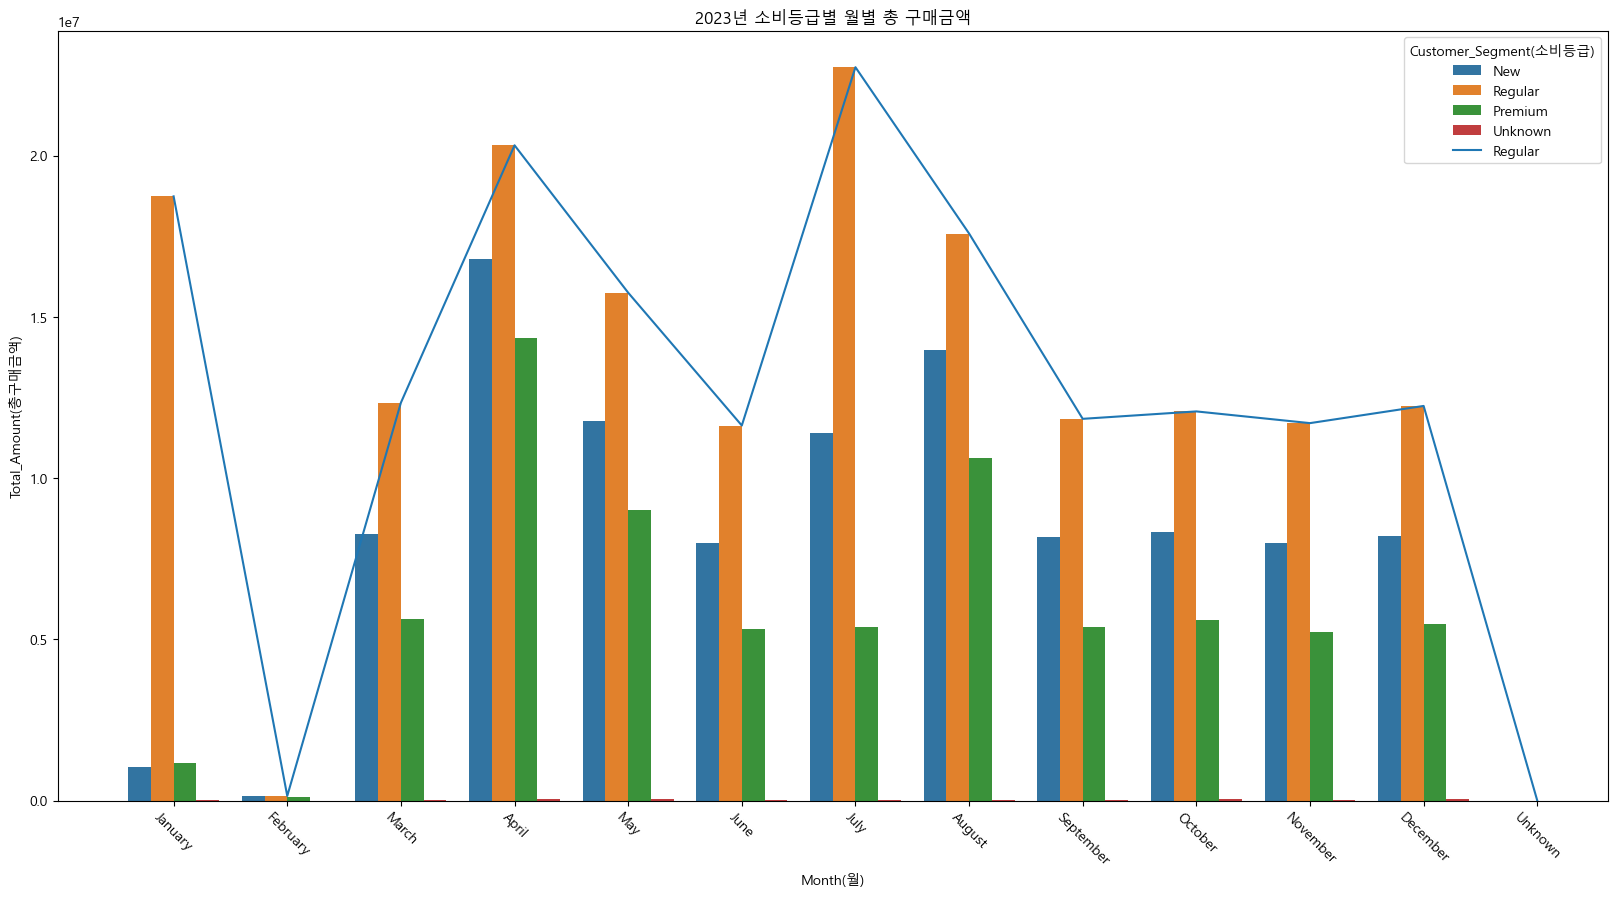

In [53]:
# 2023년의 월을 기준으로 소비등급별 구매금액 비교
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(data=d, x='Month(월)', y='Total_Amount(총구매금액)', ax=ax,
            hue='Customer_Segment(소비등급)', hue_order=['New', 'Regular', 'Premium', 'Unknown'], order=month_order)
sns.lineplot(data=d, x='Month(월)', y='Total_Amount(총구매금액)', ax=ax,
             hue='Customer_Segment(소비등급)', hue_order=['Regular'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
ax.set_title('2023년 소비등급별 월별 총 구매금액')
plt.show()

다른 소비등급은 4월의 구매금액이 가장 많았으나, Regular 등급은 7월의 구매금액이 가장 많았던 것으로 보인다.

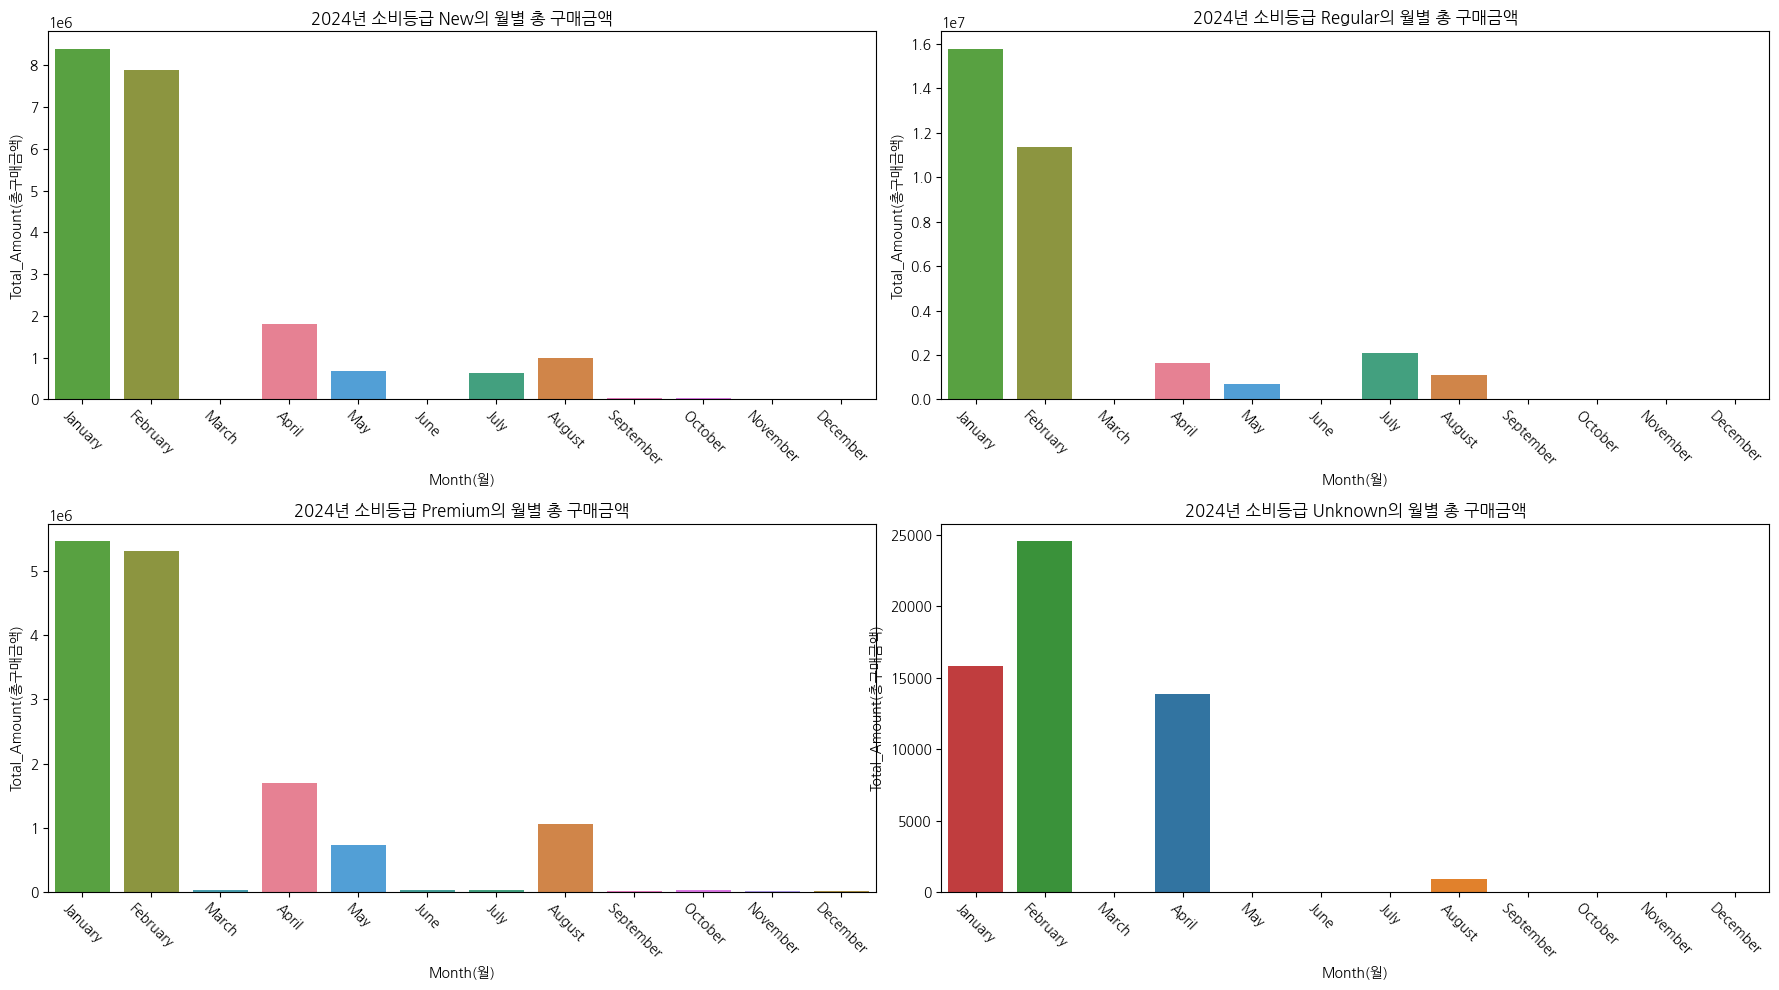

In [105]:
# 2024년 월별, 소비등급별 매출
e = df_notnull[df_notnull['Year(연도)'] == 2024].groupby(['Month(월)', 'Customer_Segment(소비등급)'])[['Total_Amount(총구매금액)']].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18,10))
segment = ['New', 'Regular', 'Premium', 'Unknown']
for i, seg in enumerate(segment):
    plt.subplot(2, 2, i+1)
    plt.tight_layout()
    plt.xticks(rotation=-45)
    plt.title(f'2024년 소비등급 {seg}의 월별 총 구매금액')

    sns.barplot(data=e[e['Customer_Segment(소비등급)'] == seg], x='Month(월)', y='Total_Amount(총구매금액)',
                order=month_order, hue='Month(월)')

2024년도의 매출은 정확한 값이라고 보기는 어려울 것 같다.

In [108]:
df_notnull.groupby(['Customer_Segment(소비등급)', 'Year(연도)', 'Month(월)'])[['Total_Amount(총구매금액)']].sum().reset_index()

,Customer_Segment(소비등급),Year(연도),Month(월),Total_Amount(총구매금액)
0,New,2023,April,1.679113e+07
1,New,2023,August,1.397604e+07
2,New,2023,December,8.209606e+06
3,New,2023,February,1.353320e+05
4,New,2023,January,1.046176e+06
...,...,...,...,...
83,Unknown,2023,September,1.419941e+04
84,Unknown,2024,April,1.382966e+04
85,Unknown,2024,August,9.321975e+02
86,Unknown,2024,February,2.453604e+04


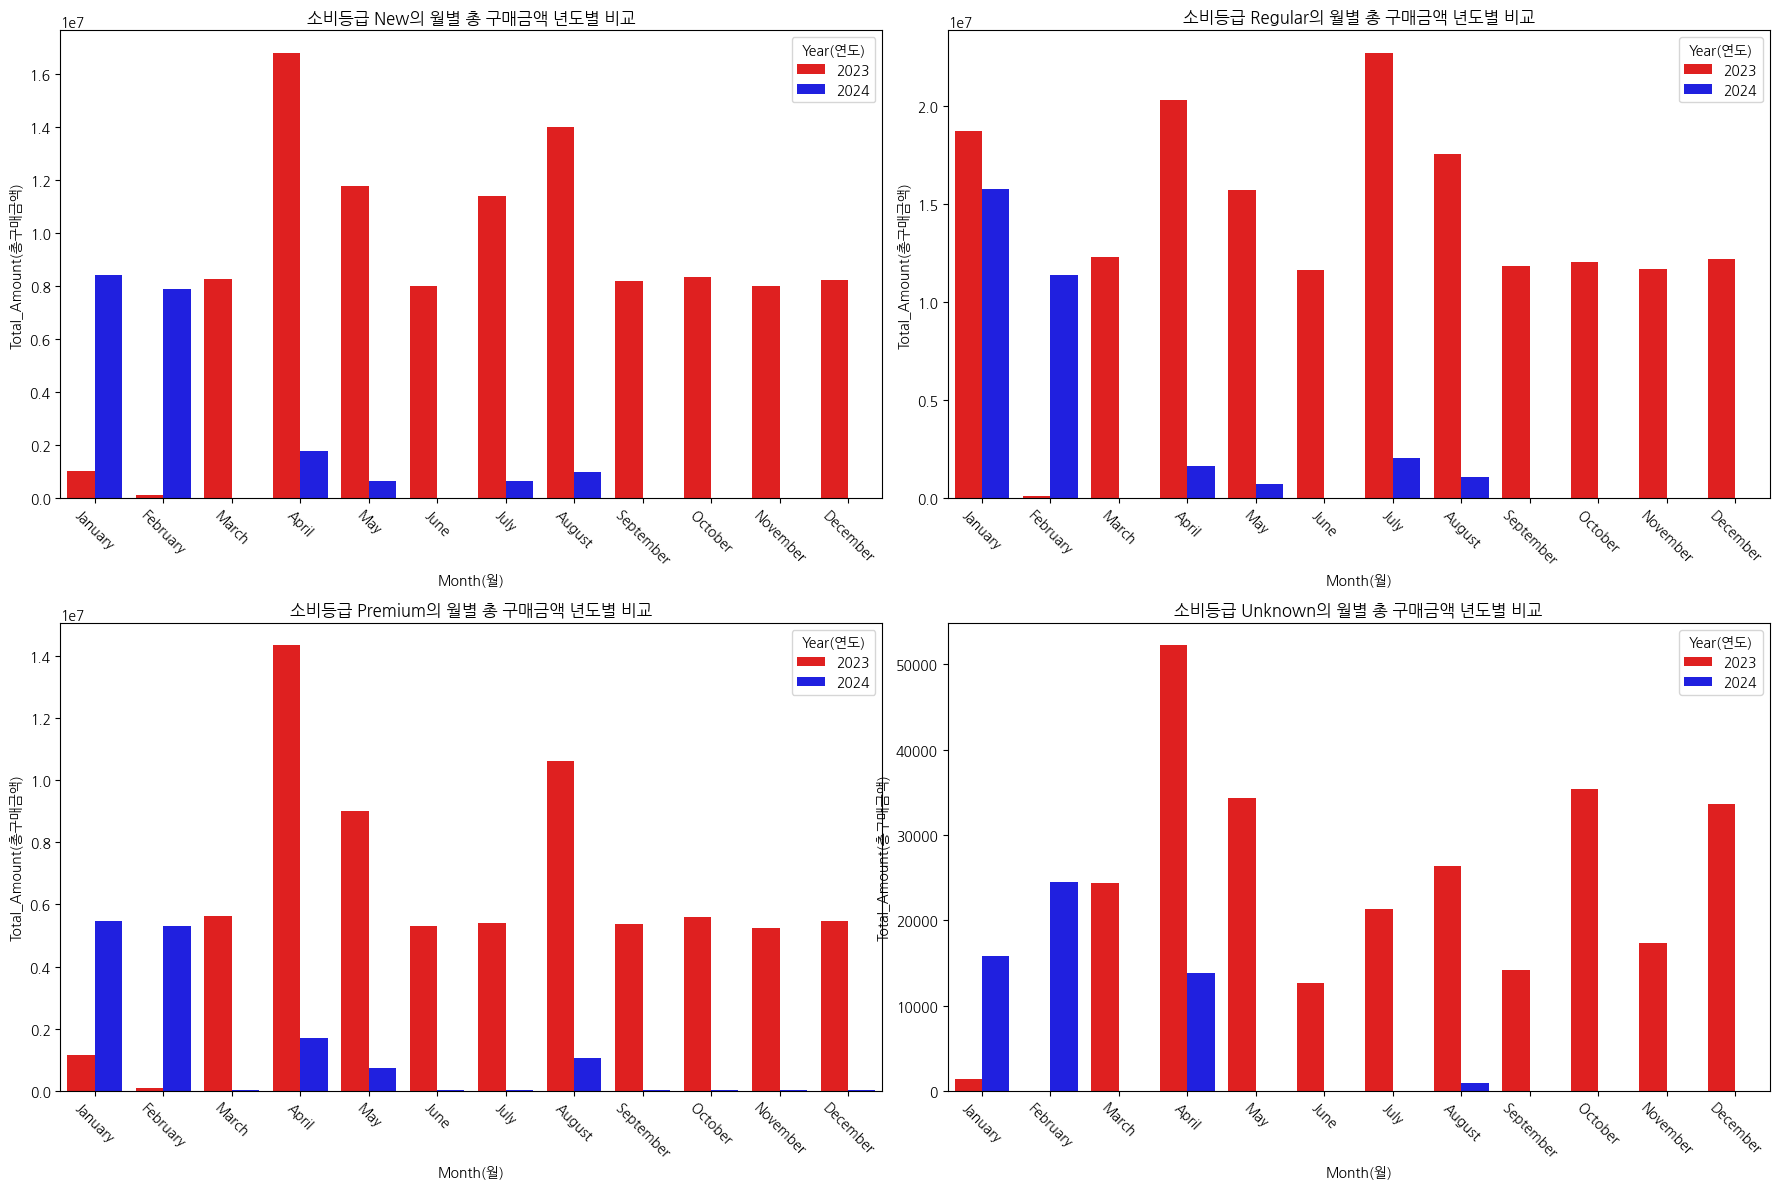

In [113]:
# 월별, 소비등급별 매출 년도별 비교 시각화
f = df_notnull.groupby(['Customer_Segment(소비등급)', 'Year(연도)', 'Month(월)'])[['Total_Amount(총구매금액)']].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18,12))
segment = ['New', 'Regular', 'Premium', 'Unknown']
for i, seg in enumerate(segment):
    plt.subplot(2, 2, i+1)
    plt.tight_layout()
    plt.xticks(rotation=-45)
    plt.title(f'소비등급 {seg}의 월별 총 구매금액 년도별 비교')

    sns.barplot(data=f[f['Customer_Segment(소비등급)'] == seg], x='Month(월)', y='Total_Amount(총구매금액)',
                order=month_order, hue='Year(연도)', palette=['red', 'blue'])

전체적으로 2023년도의 매출에 비해 2024년의 매출이 현저히 낮으며, 이는 현재가 2024년인 것을 생각하면 당연한 결과일 수 있다.\
그럼에도 2024년 1월 ~ 2월의 매출은 전년도에 비해 월등히 높은 것을 볼 수 있다.

<Axes: xlabel='Customer_Segment(소비등급)', ylabel='Total_Amount(총구매금액)'>

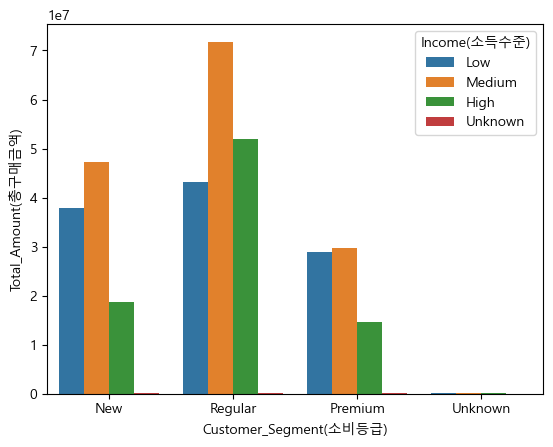

In [54]:
# 2023년도 기준 소득수준과 소비등급의 매출 관계 파악
g = df_notnull[df_notnull['Year(연도)'] == 2023].groupby(['Customer_Segment(소비등급)', 'Income(소득수준)'])[['Total_Amount(총구매금액)']].sum().reset_index()
sns.barplot(data=g, x='Customer_Segment(소비등급)', y='Total_Amount(총구매금액)',
            hue='Income(소득수준)', hue_order=['Low', 'Medium', 'High', 'Unknown'], order=['New', 'Regular', 'Premium', 'Unknown'])

모든 소비등급에서 소득수준이 medium 인 고객이 소비를 많이 하는 것으로 보이며,\
특히 역시나 Regular 등급에서 소비가 많이 나타난다.

In [55]:
# df_notnull[:5]
# df_notnull[df_notnull['Year(연도)'] == 0]
df_notnull.to_csv('./new_retail_data_notnull_2.csv', index=False)

### 2. 소비등급이 Regular 인 고객들의 데이터

In [117]:
# 소비등급이 Regular인 고객들의 데이터
regular = df_notnull[df_notnull['Customer_Segment(소비등급)'] == 'Regular'].reset_index().iloc[:, 1:]
regular[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,6679610,30192,Geelong,New South Wales,Australia,48,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
2,8493213,19136,Portsmouth,England,UK,64,Female,Low,Regular,7/20/2023,2023,July,23:06:51,4.0,90.981870,363.927479,Home Decor,Home Depot,Tools,Average,Standard,Credit Card,Shipped,2.0,Screwdriver set


In [12]:
# 소비등급이 Regular인 사람들의 평점
regular.groupby(['Ratings(평점)'])[['Ratings(평점)']].count()

,Ratings(평점)
Ratings(평점),
0.0,117
1.0,24453
2.0,32741
3.0,22840
4.0,44405
5.0,21665


In [13]:
# 소비등급이 Regular인 사람들의 나이별 총 구매금액
regular.groupby(['Age(나이)'])[['Total_Amount(총구매금액)']].sum().sort_values(by='Total_Amount(총구매금액)', ascending=False)[:5]

,Total_Amount(총구매금액)
Age(나이),
22,2.853114e+07
26,2.485344e+07
23,1.839983e+07
20,1.533136e+07
46,1.434075e+07


In [16]:
regular.groupby('Gender(성별)')[['Total_Amount(총구매금액)']].sum().sort_values(by='Total_Amount(총구매금액)', ascending=False)

,Total_Amount(총구매금액)
Gender(성별),
Male,1.269958e+08
Female,7.276368e+07
Unknown,2.060937e+05


총구매금액이 가장 많은 소비등급이 'Regular'인 사람들은\
평점을 4점으로 준 경우가 많았던 것으로 보아 대부분 소비에 만족했고, 다음으로는 평점을 2점으로 준 경우가 많았다.\
22세의 소비가 가장 많았고, 다음으로 26세, 23세, 20세, 46세 순으로 20대의 소비가 가장 많은 것으로 보인다.\
또한 소득수준이 Medium인 사람들의 소비가 가장 많았으며, 다음으로 High, Low 순이었다.\
여성보다 남성의 경우가 소비를 더 많이 하는 것으로 보인다.

In [17]:
print(len(df_notnull['Age(나이)'].unique()))
df_notnull['Age(나이)'].unique()

54


array([21, 19, 48, 56, 22, 58, 29, 46, 25, 64, 31, 53, 32, 43, 69, 49, 61,
       41, 38, 59, 20, 67, 50, 26, 66, 24, 54, 28, 34, 65, 40, 68, 36, 57,
       27, 35, 70, 37, 30, 39, 47, 18, 60, 33, 62, 42, 44, 51, 63, 55, 23,
       52,  0, 45])

In [18]:
np.min([21, 19, 48, 56, 22, 58, 29, 46, 25, 64, 31, 53, 32, 43, 69, 49, 61,
41, 38, 59, 20, 67, 50, 26, 66, 24, 54, 28, 34, 65, 40, 68, 36, 57,
27, 35, 70, 37, 30, 39, 47, 18, 60, 33, 62, 42, 44, 51, 63, 55, 23,
52, 45])

np.int64(18)

In [19]:
regular_gender = pd.pivot_table(data=df_notnull, values='Total_Amount(총구매금액)', index='Age(나이)', columns='Gender(성별)', aggfunc='sum').reset_index().iloc[:, :3]
regular_gender

Gender(성별),Age(나이),Female,Male
0,0,1.007448e+05,1.374986e+05
1,18,7.549663e+05,1.153340e+06
2,19,8.533706e+06,1.295121e+07
3,20,1.814228e+07,2.782324e+07
4,21,4.493319e+06,6.625852e+06
5,22,1.265226e+07,1.891162e+07
6,23,9.869788e+06,1.475621e+07
7,24,3.423195e+06,5.101368e+06
8,25,1.441221e+06,2.122088e+06
9,26,4.842396e+06,2.863266e+07


In [20]:
more = []
for i in range(len(regular_gender)):
    if regular_gender['Female'][i] > regular_gender['Male'][i]:
        more.append('Female')
    else:
        more.append('Male')

regular_gender['More'] = more
regular_gender[:3]

Gender(성별),Age(나이),Female,Male,More
0,0,1.007448e+05,1.374986e+05,Male
1,18,7.549663e+05,1.153340e+06,Male
2,19,8.533706e+06,1.295121e+07,Male


In [21]:
print(len(regular_gender[regular_gender['More'] == 'Female']))
print(len(regular_gender[regular_gender['More'] == 'Male']))

0
54


In [3]:
df_notnull = pd.read_csv('new_retail_data_notnull.csv')
df_notnull[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Zipcode(우편번호),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,77985,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Nottingham,England,99071,UK,19,Female,Low,Premium,12/31/2023,2023,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,75929,Australia,48,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [15]:
# Year(연도) 값이 0인 경우 Date(구매날짜) 컬럼 값에서 연도 값을 가져와 치환
for i in range(len(df_notnull)):
    if df_notnull['Year(연도)'][i] == 0:
        df_notnull['Year(연도)'][i] = int(df_notnull['Date(구매날짜)'][i][-4:])

df_notnull[df_notnull['Year(연도)'] == 0]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Zipcode(우편번호),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)


In [11]:
df_notnull['Year(연도)'].unique()

array([2023, 2024])

In [5]:
# 소비등급이 Regular인 사람들의 데이터
regular = df_notnull[df_notnull['Customer_Segment(소비등급)'] == 'Regular'].reset_index().iloc[:, 1:]
regular[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Zipcode(우편번호),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,77985,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,6679610,30192,Geelong,New South Wales,75929,Australia,48,Male,Low,Regular,4/26/2023,2023,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
2,8493213,19136,Portsmouth,England,59280,UK,64,Female,Low,Regular,7/20/2023,2023,July,23:06:51,4.0,90.981870,363.927479,Home Decor,Home Depot,Tools,Average,Standard,Credit Card,Shipped,2.0,Screwdriver set


In [6]:
# 소비등급 Regular인 사람들의 국가별, 주별 매출비교
regular.groupby('Country(국가)')[['Total_Amount(총구매금액)']].sum().sort_values(by='Total_Amount(총구매금액)', ascending=False)

,Total_Amount(총구매금액)
Country(국가),
USA,6.530286e+07
UK,4.921060e+07
Germany,3.503005e+07
Australia,2.533955e+07
Canada,2.496077e+07
Unknown,1.217768e+05


In [7]:
regular.groupby('State(주)')[['Total_Amount(총구매금액)']].sum().sort_values(by='Total_Amount(총구매금액)', ascending=False)[:10]

,Total_Amount(총구매금액)
State(주),
England,4.918889e+07
Berlin,3.502733e+07
New South Wales,2.534971e+07
Ontario,2.494669e+07
Maine,1.578138e+07
Georgia,1.227098e+07
Connecticut,9.848760e+06
Kansas,3.699103e+06
Florida,5.746273e+05


In [40]:
# 연도별, 월별 매출 비교
# regular.groupby(['Year(연도)', 'Month(월)'])[['Total_Amount(총구매금액)']].sum().sort_values(by='Total_Amount(총구매금액)', ascending=False)
# pd.pivot_table(data=regular, values='Total_Amount(총구매금액)', columns='Year(연도)', index='Month(월)', aggfunc='sum')
regular_ym = pd.pivot_table(data=regular, values='Total_Amount(총구매금액)', columns='Year(연도)', index='Month(월)', aggfunc='sum')
regular_ym

Year(연도),2023,2024
Month(월),,
April,2.030994e+07,1.656965e+06
August,1.756684e+07,1.105872e+06
December,1.221538e+07,1.323900e+04
February,1.423491e+05,1.137028e+07
January,1.873655e+07,1.576458e+07
July,2.273092e+07,2.075015e+06
June,1.161749e+07,3.965774e+04
March,1.231856e+07,3.432232e+04
May,1.573510e+07,7.146992e+05


In [42]:
regular_ym.iloc[:, :1].sort_values(by=(2023), ascending=False)[:3]

Year(연도),2023
Month(월),
July,2.273092e+07
April,2.030994e+07
January,1.873655e+07


In [43]:
regular_ym.iloc[:, 1:].sort_values(by=(2024), ascending=False)[:3]

Year(연도),2024
Month(월),
January,1.576458e+07
February,1.137028e+07
July,2.075015e+06


In [12]:
# df_notnull[df_notnull['Year(연도)'] == 0]
df_notnull[df_notnull['Date(구매날짜)'] == 'Unknown']

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Zipcode(우편번호),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
3921,2771549,59548,Portsmouth,England,68989,UK,21,Female,Medium,Regular,Unknown,2023,November,18:14:15,1.0,292.031675,292.031675,Home Decor,Home Depot,Furniture,Average,Standard,Credit Card,Delivered,2.0,Dining table
4342,2632074,93647,Portsmouth,England,24000,UK,24,Male,Medium,Regular,Unknown,2023,July,3:05:25,7.0,338.715576,2371.009032,Books,HarperCollins,Non-Fiction,Bad,Express,Debit Card,Pending,1.0,Psychology
5135,3349514,71021,Portsmouth,England,47239,UK,24,Female,Medium,Regular,Unknown,2023,July,14:01:47,7.0,249.679524,1747.756665,Clothing,Nike,Shorts,Bad,Standard,PayPal,Shipped,1.0,Cargo shorts
5231,4043499,17605,Portsmouth,England,36062,UK,24,Male,Medium,Regular,Unknown,2023,June,6:13:33,7.0,302.073805,2114.516634,Home Decor,IKEA,Lighting,Bad,Standard,Credit Card,Pending,1.0,Recessed lighting
6857,9686043,16259,Portsmouth,England,72778,UK,24,Male,Medium,Regular,Unknown,2023,October,14:08:34,5.0,231.726948,1158.634738,Electronics,Apple,Tablet,Good,Express,Debit Card,Delivered,4.0,Sony Xperia Tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297935,4204783,22912,Tulsa,Oregon,97625,USA,50,Male,Low,Regular,Unknown,2023,December,21:14:27,7.0,93.545264,654.816847,Grocery,Nestle,Snacks,Excellent,Express,Credit Card,Delivered,5.0,Granola bars
298792,2742967,57511,Essen,Berlin,82263,Germany,24,Female,High,Regular,Unknown,2023,April,3:31:42,8.0,213.317274,1706.538194,Home Decor,Home Depot,Decorations,Bad,Express,Credit Card,Shipped,1.0,Rugs
298832,6673065,83349,Bristol,England,10611,UK,63,Male,Medium,Premium,Unknown,2023,March,23:47:49,4.0,476.360238,1905.440951,Books,Random House,Fiction,Good,Express,Credit Card,Pending,4.0,Romance
300441,7126641,61813,Manchester,England,88333,UK,35,Female,Low,Premium,Unknown,2024,February,20:30:33,5.0,325.208673,1626.043364,Books,Random House,Literature,Excellent,Express,Credit Card,Shipped,4.0,Short stories


In [13]:
# 상품별 매출비교
pd.pivot_table(data=regular, values='Total_Amount(총구매금액)', columns='Year(연도)', index='Product_Category(카테고리)', aggfunc='sum')

Year(연도),2023,2024
Product_Category(카테고리),,
Books,3.036783e+07,5.997828e+06
Clothing,3.046509e+07,5.772087e+06
Electronics,4.075244e+07,8.066116e+06
Grocery,3.491757e+07,6.966978e+06
Home Decor,3.043808e+07,6.040161e+06
Unknown,1.489702e+05,3.245823e+04


In [25]:
# 브랜드별 매출비교
regular_brand = pd.pivot_table(data=regular, values='Total_Amount(총구매금액)', columns='Year(연도)', index='Product_Brand(브랜드)', aggfunc='sum')
regular_brand

Year(연도),2023,2024
Product_Brand(브랜드),,
Adidas,1.009628e+07,2.002374e+06
Apple,9.864383e+06,1.929227e+06
Bed Bath & Beyond,1.039326e+07,2.087936e+06
BlueStar,8.244586e+05,1.797543e+05
Coca-Cola,1.017548e+07,2.016731e+06
HarperCollins,9.979041e+06,2.096644e+06
Home Depot,9.931823e+06,2.065768e+06
IKEA,1.009714e+07,1.887507e+06
Mitsubhisi,2.506599e+06,4.533317e+05


In [35]:
regular_brand.iloc[:, :1].sort_values(by=(2023), ascending=False)

Year(연도),2023
Product_Brand(브랜드),
Pepsi,1.465529e+07
Bed Bath & Beyond,1.039326e+07
Random House,1.025221e+07
Zara,1.023822e+07
Samsung,1.020926e+07
Coca-Cola,1.017548e+07
Nike,1.013034e+07
Penguin Books,1.012915e+07
Sony,1.012020e+07


In [38]:
regular_brand.iloc[:, 1:].sort_values(by=(2024), ascending=False)

Year(연도),2024
Product_Brand(브랜드),
Pepsi,2.904519e+06
HarperCollins,2.096644e+06
Samsung,2.091340e+06
Bed Bath & Beyond,2.087936e+06
Home Depot,2.065768e+06
Nestle,2.035031e+06
Coca-Cola,2.016731e+06
Random House,2.013152e+06
Adidas,2.002374e+06


In [44]:
# 피드백 별 총 구매금액 비교
regular[:1]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Zipcode(우편번호),Country(국가),Age(나이),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,77985,Germany,21,Male,Low,Regular,9/18/2023,2023,September,22:03:55,3.0,108.028757,324.08627,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts


In [46]:
regular.groupby('Feedback(피드백)')[['Total_Amount(총구매금액)']].sum().sort_values(by='Total_Amount(총구매금액)', ascending=False)

,Total_Amount(총구매금액)
Feedback(피드백),
Good,6.226417e+07
Excellent,5.873705e+07
Average,4.521163e+07
Bad,3.359182e+07
Unknown,1.609373e+05
